<a href="https://colab.research.google.com/github/mgstingl/c2_fiuba/blob/main/Fuentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

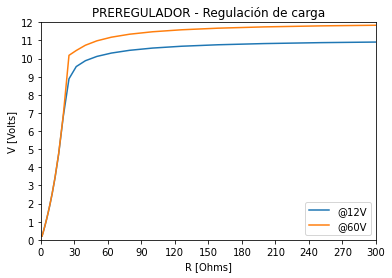

In [ ]:
## PREREGULADOR
## Regulación de Carga
# Con 12 V a la entrada
folder = "./Preregulador con Foldback_RegCarga12V.txt"
df = pd.read_csv(folder,sep = "\t")
Rs = []
Vs = []
for i,v in enumerate(df.values[:]):
  if v[0].startswith("Step"):
    Rs.append(float(v[0].split(" ", 2)[2].split(" ", 1)[0].split("=")[1].replace("K","000")))
    Vs.append(df.values[i+1][1])
plt.plot(Rs,Vs)
# Con 60 V a la entrada
folder = "./Preregulador con Foldback_RegCarga60V.txt"
df = pd.read_csv(folder,sep = "\t")
Rs = []
Vs = []
for i,v in enumerate(df.values[:]):
  if v[0].startswith("Step"):
    Rs.append(float(v[0].split(" ", 2)[2].split(" ", 1)[0].split("=")[1].replace("K","000")))
    Vs.append(df.values[i+1][1])
plt.plot(Rs,Vs)
plt.xlabel("R [Ohms]")
plt.ylabel("V [Volts]")
plt.legend(["@12V","@60V"])
plt.axis([0, 300,0,  12])
plt.xticks(np.linspace(0,300,11))
plt.yticks(np.linspace(0,12,13))
plt.title("PREREGULADOR - Regulación de carga")
plt.savefig("./RegCargaPre.png")

plt.show()


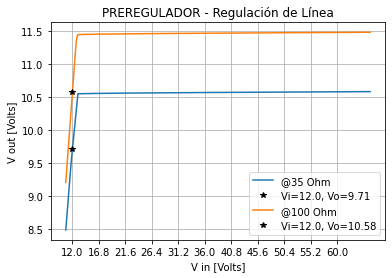

In [ ]:
## PREREGULADOR
## Regulación de Línea
# Con RL=35 Ohm a la entrada
folder = "./Preregulador con Foldback_RegLinea35Ohm.txt"
df = pd.read_csv(folder, sep='\t')
plt.plot(df["v1"],df["V(v_pre)"])
plt.plot(df["v1"][12],df["V(v_pre)"][12], "*k")
str1="Vi={0}, Vo={1}".format(df["v1"][12],np.round(df["V(v_pre)"][12],3))
## Regulación de Línea
# Con RL=100 Ohm a la entrada
folder = "./Preregulador con Foldback_RegLinea100Ohm.txt"
df = pd.read_csv(folder, sep='\t')
plt.plot(df["v1"],df["V(v_pre)"])
plt.plot(df["v1"][12],df["V(v_pre)"][12], "*k")
str2="Vi={0}, Vo={1}".format(df["v1"][12],np.round(df["V(v_pre)"][12],2))
plt.xticks(np.linspace(12,60,11))
plt.xlabel("V in [Volts]")
plt.ylabel("V out [Volts]")
plt.legend(["@35 Ohm",str1,"@100 Ohm",str2])
plt.title("PREREGULADOR - Regulación de Línea")
plt.grid("minor")
plt.savefig("./RegLineaPre.png")
plt.show()


Se han truncado las últimas 5000 líneas del flujo de salida.
55139
55140
55141
55142
55143
55144
55145
55146
55147
55148
55149
55150
55151
55152
55153
55154
55155
55156
55157
55158
55159
55160
55161
55162
55163
55164
55165
55166
55167
55168
55169
55170
55171
55172
55173
55174
55175
55176
55177
55178
55179
55180
55181
55182
55183
55184
55185
55186
55187
55188
55189
55190
55191
55192
55193
55194
55195
55196
55197
55198
55199
55200
55201
55202
55203
55204
55205
55206
55207
55208
55209
55210
55211
55212
55213
55214
55215
55216
55217
55218
55219
55220
55221
55222
55223
55224
55225
55226
55227
55228
55229
55230
55231
55232
55233
55234
55235
55236
55237
55238
55239
55240
55241
55242
55243
55244
55245
55246
55247
55248
55249
55250
55251
55252
55253
55254
55255
55256
55257
55258
55259
55260
55261
55262
55263
55264
55265
55266
55267
55268
55269
55270
55271
55272
55273
55274
55275
55276
55277
55278
55279
55280
55281
55282
55283
55284
55285
55286
55287
55288
55289
55290
55291
55292
55293
55294
552

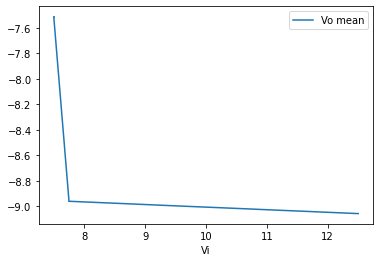

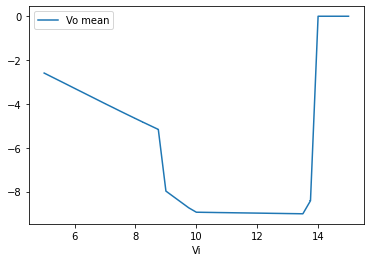

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fuente auxiliar -9V
## Regulación de Línea
folder = "./FuenteAuxiliarNegativa_RegLinea100Ohm.txt"
df = pd.read_csv(folder,sep = "\t")
V = {"Vi": [], "Vo mean":[], "Vo std": []}
aux = {"Vi": 0, "Vo": []}
for i,v in enumerate(df.values[:]):
  if v[0].startswith("Step"):
    vi = float(v[0].split(" ", 2)[2].split(" ", 1)[0].split("=")[1])
    print(df.values[i+1][1])
    if aux["Vi"]!=0:
      V["Vo mean"].append(np.mean(aux["Vo"]))
      V["Vo std"].append(np.std(aux["Vo"]))
      aux["Vo"] = []
    V["Vi"].append(vi)
    aux["Vi"] =vi
  else :
    aux["Vo"].append(df.values[i][1])
V["Vo mean"].append(np.mean(aux["Vo"]))
V["Vo std"].append(np.std(aux["Vo"]))

df = pd.DataFrame(V)
print(V)
df.to_csv("RegLinea-9V100Ohm.csv")
df.plot(x="Vi", y="Vo mean", yerr = "Vo std")
## Fuente auxiliar -9V
## Regulación de Línea 
folder = "./FuenteAuxiliarNegativa_RegLinea35Ohm.txt"
df = pd.read_csv(folder,sep = "\t")
V = {"Vi": [], "Vo mean":[], "Vo std": []}
aux = {"Vi": 0, "Vo": []}
for i,v in enumerate(df.values[:]):
  if v[0].startswith("Step"):
    vi = float(v[0].split(" ", 2)[2].split(" ", 1)[0].split("=")[1])
    if aux["Vi"]!=0:
      V["Vo mean"].append(np.mean(aux["Vo"]))
      V["Vo std"].append(np.std(aux["Vo"]))
      aux["Vo"] = []
    V["Vi"].append(vi)
    aux["Vi"] =vi
  else :
    aux["Vo"].append(df.values[i][1])
V["Vo mean"].append(np.mean(aux["Vo"]))
V["Vo std"].append(np.std(aux["Vo"]))
df = pd.DataFrame(V)
print(V)
df.to_csv("RegLinea-9V35Ohm.csv")
df.plot(x="Vi", y="Vo mean", yerr = "Vo std")


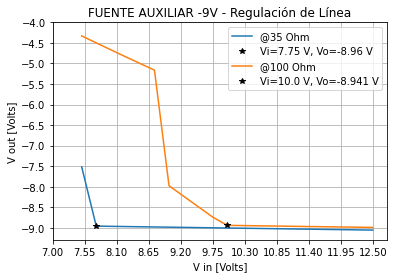

<Figure size 432x288 with 0 Axes>

In [ ]:
## FUENTE AUXILIAR -9V
## Regulación de Línea
# Con RL=100 Ohm a la entrada
folder = "./RegLinea-9V100Ohm.csv"
df = pd.read_csv(folder, sep=',')
plt.plot(df["Vi"],df["Vo mean"])
plt.plot(df["Vi"][1],df["Vo mean"][1], "*k")
str1="Vi={0} V, Vo={1} V".format(df["Vi"][1],np.round(df["Vo mean"][1],3))
## Regulación de Línea
# Con RL=35 Ohm a la entrada
folder = "./RegLinea-9V35Ohm.csv"
df = pd.read_csv(folder, sep=',')[10:31]
plt.plot(df["Vi"],df["Vo mean"])
plt.plot(df["Vi"][20],df["Vo mean"][20], "*k")
str2="Vi={0} V, Vo={1} V".format(df["Vi"][20],np.round(df["Vo mean"][20],3))
plt.xticks(np.linspace(7,12.5,11))
plt.yticks(np.linspace(-9,-4,11))
plt.xlabel("V in [Volts]")
plt.ylabel("V out [Volts]")
plt.legend(["@35 Ohm",str1,"@100 Ohm",str2])
plt.title("FUENTE AUXILIAR -9V - Regulación de Línea")
plt.grid("minor")
plt.show()
plt.savefig("./RegLinea-9V.png")



-0.23929210000000004
-0.2689101
-0.2672977
-0.31744829999999996
-0.35966729999999997
-0.41041229999999995
-0.4964708
-0.4949259
-0.552896
-0.6529993000000001
-0.752287
-0.8429502000000001
-0.9327361999999999
-1.001793
-1.113794
-1.250889
-1.387742
-1.537924
-1.7369139999999998
-1.894212
-2.122092
-2.31176
-2.556349
-2.859377
-3.118259
-3.427322
-6.14811
-6.617953999999999
-7.093453
-7.579928
-8.066692999999999
-8.547842
-8.935716000000001
-8.958478
-8.965856
-8.971843
-8.977077
-8.983566
-8.988027
-8.994195
-8.997132
{'R': [1.0, 1.12202, 1.25893, 1.41254, 1.58489, 1.77828, 1.99526, 2.23872, 2.51189, 2.81838, 3.16228, 3.54813, 3.98107, 4.46684, 5.01187, 5.62341, 6.30957, 7.07946, 7.94328, 8.91251, 10.0, 11.2202, 12.5893, 14.1254, 15.8489, 17.7828, 19.9526, 22.3872, 25.1189, 28.1838, 31.6228, 35.4813, 39.8107, 44.6684, 50.1187, 56.2341, 63.0957, 70.7946, 79.4328, 89.1251, 100.0], 'Vo mean': [-0.22790299798387095, -0.2561615237262737, -0.2888016651679842, -0.32406871945863125, -0.36343378

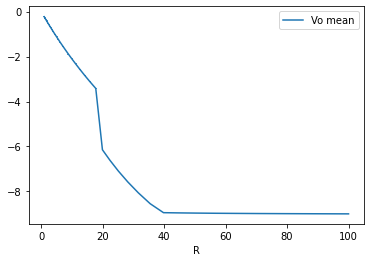

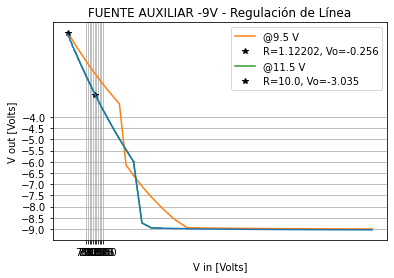

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fuente auxiliar -9V
## Regulación de Carga
folder = "./FuenteAuxiliarNegativa_RegCarga9_5V.txt"
df = pd.read_csv(folder,sep = "\t")
V = {"R": [], "Vo mean":[], "Vo std": []}
aux = {"R": 0, "Vo": []}
for i,v in enumerate(df.values[:]):
  if v[0].startswith("Step"):
    ri = float(v[0].split(" ", 2)[2].split(" ", 1)[0].split("=")[1])
    print(df.values[i+1][1])
    if aux["R"]!=0:
      V["Vo mean"].append(np.mean(aux["Vo"]))
      V["Vo std"].append(np.std(aux["Vo"]))
      aux["Vo"] = []
    V["R"].append(ri)
    aux["R"] =ri
  else :
    aux["Vo"].append(df.values[i][1])
V["Vo mean"].append(np.mean(aux["Vo"]))
V["Vo std"].append(np.std(aux["Vo"]))

df = pd.DataFrame(V)
print(V)
df.to_csv("RegCarga-9V9_5V.csv")
df.plot(x="R", y="Vo mean", yerr = "Vo std")

## Fuente auxiliar -9V
## Regulación de Carga
folder = "./FuenteAuxiliarNegativa_RegCarga11_5V.txt"
df = pd.read_csv(folder,sep = "\t")
V = {"R": [], "Vo mean":[], "Vo std": []}
aux = {"R": 0, "Vo": []}
for i,v in enumerate(df.values[:]):
  if v[0].startswith("Step"):
    ri = float(v[0].split(" ", 2)[2].split(" ", 1)[0].split("=")[1])
    print(df.values[i+1][1])
    if aux["R"]!=0:
      V["Vo mean"].append(np.mean(aux["Vo"]))
      V["Vo std"].append(np.std(aux["Vo"]))
      aux["Vo"] = []
    V["R"].append(ri)
    aux["R"] =ri
  else :
    aux["Vo"].append(df.values[i][1])
V["Vo mean"].append(np.mean(aux["Vo"]))
V["Vo std"].append(np.std(aux["Vo"]))

df = pd.DataFrame(V)
print(V)
df.to_csv("RegCarga-9V11_5V.csv")
df.plot(x="R", y="Vo mean", yerr = "Vo std")

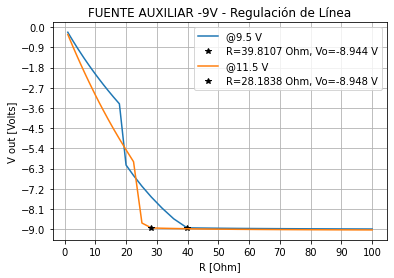

In [ ]:
## FUENTE AUXILIAR -9V
## Regulación de Carga
# Con Vi = 9.5V 
folder = "./RegCarga-9V9_5V.csv"
df = pd.read_csv(folder, sep=',')
plt.plot(df["R"],df["Vo mean"])
plt.plot(df["R"][32],df["Vo mean"][32], "*k")
str1="R={0} Ohm, Vo={1} V".format(df["R"][32],np.round(df["Vo mean"][32],3))
## Regulación de Línea
# Con Vi = 11.5V 
folder = "./RegCarga-9V11_5V.csv"
df = pd.read_csv(folder, sep=',')
plt.plot(df["R"],df["Vo mean"])
plt.plot(df["R"][29],df["Vo mean"][29], "*k")
str2="R={0} Ohm, Vo={1} V".format(df["R"][29],np.round(df["Vo mean"][29],3))
plt.xticks(np.linspace(0,100,11))
plt.yticks(np.linspace(-9,-0,11))
plt.xlabel("R [Ohm]")
plt.ylabel("V out [Volts]")
plt.legend(["@9.5 V ",str1,"@11.5 V",str2])
plt.title("FUENTE AUXILIAR -9V - Regulación de Línea")
plt.grid("minor")
plt.savefig("./RegCarga-9V.png")

plt.show()


6.998837
7.248684
7.49833
7.748933999999999
7.999331
8.249046
8.498403
8.74957
8.998924
8.998935000000001
8.999236999999999
8.999303
8.999667
8.999689
8.999911
8.999963000000001
9.000123
9.000344
9.000283999999999
9.000324
8.999645
{'Vi': [7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 12.0, 12.25, 12.5], 'Vo mean': [6.999239749999999, 7.24919605, 7.4991383888888885, 7.749136684210525, 7.999121100000001, 8.249070750000001, 8.498986384615387, 8.7491116, 8.9988691, 8.999013299999998, 8.999186333333334, 8.999334399999999, 8.999510249999998, 8.99965718181818, 8.999821, 8.999969749999998, 9.0001284, 9.00028775757576, 9.00043848275862, 9.000597346938774, 9.000746246753247], 'Vo std': [9.239744314639754e-05, 0.0001174723265283874, 0.0001960632377827562, 4.777364681131841e-05, 4.815485437604409e-05, 5.682209077465677e-06, 0.0001684086323670429, 0.00022920000000041797, 1.8300000000159853e-05, 2.60999999996514e-05, 1.7913371789492696e-0

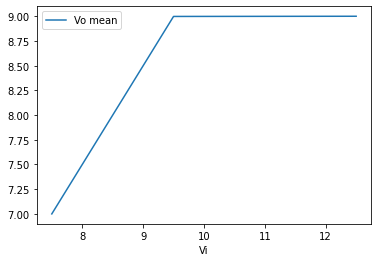

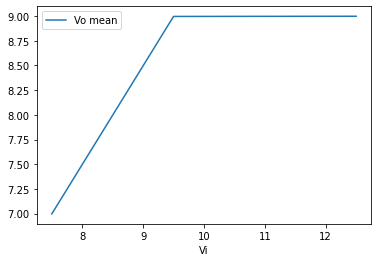

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fuente auxiliar +9V
## Regulación de Línea
folder = "./FuenteAuxiliarPositiva_RegLinea100Ohm.txt"
df = pd.read_csv(folder,sep = "\t")
V = {"Vi": [], "Vo mean":[], "Vo std": []}
aux = {"Vi": 0, "Vo": []}
for i,v in enumerate(df.values[:]):
  if v[0].startswith("Step"):
    vi = float(v[0].split(" ", 2)[2].split(" ", 1)[0].split("=")[1])
    print(df.values[i+1][1])
    if aux["Vi"]!=0:
      V["Vo mean"].append(np.mean(aux["Vo"]))
      V["Vo std"].append(np.std(aux["Vo"]))
      aux["Vo"] = []
    V["Vi"].append(vi)
    aux["Vi"] =vi
  else :
    aux["Vo"].append(df.values[i][1])
V["Vo mean"].append(np.mean(aux["Vo"]))
V["Vo std"].append(np.std(aux["Vo"]))

df = pd.DataFrame(V)
print(V)
df.to_csv("RegLinea9V100Ohm.csv")
df.plot(x="Vi", y="Vo mean", yerr = "Vo std")
## Fuente auxiliar +9V
## Regulación de Línea 
folder = "./FuenteAuxiliarPositiva_RegLinea35Ohm.txt"
df = pd.read_csv(folder,sep = "\t")
V = {"Vi": [], "Vo mean":[], "Vo std": []}
aux = {"Vi": 0, "Vo": []}
for i,v in enumerate(df.values[:]):
  if v[0].startswith("Step"):
    vi = float(v[0].split(" ", 2)[2].split(" ", 1)[0].split("=")[1])
    if aux["Vi"]!=0:
      V["Vo mean"].append(np.mean(aux["Vo"]))
      V["Vo std"].append(np.std(aux["Vo"]))
      aux["Vo"] = []
    V["Vi"].append(vi)
    aux["Vi"] =vi
  else :
    aux["Vo"].append(df.values[i][1])
V["Vo mean"].append(np.mean(aux["Vo"]))
V["Vo std"].append(np.std(aux["Vo"]))
df = pd.DataFrame(V)
print(V)
df.to_csv("RegLinea9V35Ohm.csv")
df.plot(x="Vi", y="Vo mean", yerr = "Vo std")

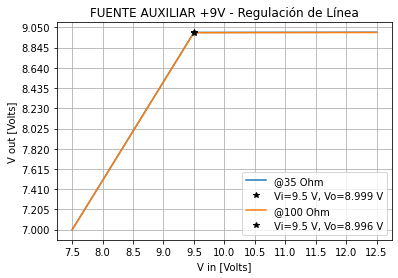

<Figure size 432x288 with 0 Axes>

In [ ]:
## FUENTE AUXILIAR +9V
## Regulación de Línea
# Con RL=100 Ohm a la entrada
folder = "./RegLinea9V100Ohm.csv"
df = pd.read_csv(folder, sep=',')
plt.plot(df["Vi"],df["Vo mean"])
plt.plot(df["Vi"][8],df["Vo mean"][8], "*k")
str1="Vi={0} V, Vo={1} V".format(df["Vi"][8],np.round(df["Vo mean"][8],3))
## Regulación de Línea
# Con RL=35 Ohm a la entrada
folder = "./RegLinea9V35Ohm.csv"
df = pd.read_csv(folder, sep=',')
plt.plot(df["Vi"],df["Vo mean"])
plt.plot(df["Vi"][8],df["Vo mean"][8], "*k")
str2="Vi={0} V, Vo={1} V".format(df["Vi"][8],np.round(df["Vo mean"][8],3))
plt.xticks(np.linspace(7.5,12.5,11))
plt.yticks(np.linspace(7,9.05,11))
plt.xlabel("V in [Volts]")
plt.ylabel("V out [Volts]")
plt.legend(["@35 Ohm",str1,"@100 Ohm",str2])
plt.title("FUENTE AUXILIAR +9V - Regulación de Línea")
plt.grid("minor")
plt.show()
plt.savefig("./RegLinea9V.png")

1.8999
2.13171
2.3918
2.683623
3.011047
3.378414
3.790602
4.253088
4.771932
5.354111
6.007333
6.740203
7.562457000000001
8.485006
8.973052000000001
8.976236
8.978760000000001
8.981207000000001
8.983203
8.985077
8.986763999999999
8.988141
8.989508
8.990636
8.991661
8.992716
8.993428
8.994177
8.994826
8.995451
8.995913999999999
8.996449
8.99685
8.997221000000001
8.997546
8.9978
8.998124
8.998382000000001
8.998594
8.998773
8.998924
{'R': [1.0, 1.12202, 1.25893, 1.41254, 1.58489, 1.77828, 1.99526, 2.23872, 2.51189, 2.81838, 3.16228, 3.54813, 3.98107, 4.46684, 5.01187, 5.62341, 6.30957, 7.07946, 7.94328, 8.91251, 10.0, 11.2202, 12.5893, 14.1254, 15.8489, 17.7828, 19.9526, 22.3872, 25.1189, 28.1838, 31.6228, 35.4813, 39.8107, 44.6684, 50.1187, 56.2341, 63.0957, 70.7946, 79.4328, 89.1251, 100.0], 'Vo mean': [1.8999, 2.13171, 2.3918, 2.6836221428571427, 3.011047, 3.3784158000000004, 3.790601166666667, 4.25307194117647, 4.7719535, 5.3541342499999995, 6.007331166666666, 6.740200214285714, 7.5624

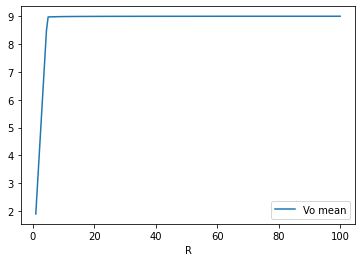

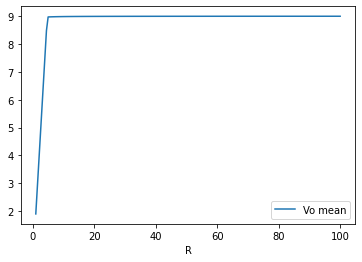

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fuente auxiliar +9V
## Regulación de Carga
folder = "./FuenteAuxiliarPositiva_RegCarga9_5V.txt"
df = pd.read_csv(folder,sep = "\t")
V = {"R": [], "Vo mean":[], "Vo std": []}
aux = {"R": 0, "Vo": []}
for i,v in enumerate(df.values[:]):
  if v[0].startswith("Step"):
    ri = float(v[0].split(" ", 2)[2].split(" ", 1)[0].split("=")[1])
    print(df.values[i+1][1])
    if aux["R"]!=0:
      V["Vo mean"].append(np.mean(aux["Vo"]))
      V["Vo std"].append(np.std(aux["Vo"]))
      aux["Vo"] = []
    V["R"].append(ri)
    aux["R"] =ri
  else :
    aux["Vo"].append(df.values[i][1])
V["Vo mean"].append(np.mean(aux["Vo"]))
V["Vo std"].append(np.std(aux["Vo"]))

df = pd.DataFrame(V)
print(V)
df.to_csv("RegCarga9V9_5V.csv")
df.plot(x="R", y="Vo mean", yerr = "Vo std")

## Fuente auxiliar +9V
## Regulación de Carga
folder = "./FuenteAuxiliarPositiva_RegCarga11_5V.txt"
df = pd.read_csv(folder,sep = "\t")
V = {"R": [], "Vo mean":[], "Vo std": []}
aux = {"R": 0, "Vo": []}
for i,v in enumerate(df.values[:]):
  if v[0].startswith("Step"):
    ri = float(v[0].split(" ", 2)[2].split(" ", 1)[0].split("=")[1])
    print(df.values[i+1][1])
    if aux["R"]!=0:
      V["Vo mean"].append(np.mean(aux["Vo"]))
      V["Vo std"].append(np.std(aux["Vo"]))
      aux["Vo"] = []
    V["R"].append(ri)
    aux["R"] =ri
  else :
    aux["Vo"].append(df.values[i][1])
V["Vo mean"].append(np.mean(aux["Vo"]))
V["Vo std"].append(np.std(aux["Vo"]))

df = pd.DataFrame(V)
print(V)
df.to_csv("RegCarga9V11_5V.csv")
df.plot(x="R", y="Vo mean", yerr = "Vo std")

    Unnamed: 0         R   Vo mean        Vo std
10          10   3.16228  6.007330  1.469694e-06
11          11   3.54813  6.740201  1.876830e-06
12          12   3.98107  7.562457  9.977753e-07
13          13   4.46684  8.485001  2.224268e-06
14          14   5.01187  8.974586  2.744702e-04
15          15   5.62341  8.977502  2.439879e-04
16          16   6.30957  8.980133  2.845797e-05
17          17   7.07946  8.982398  4.208992e-04
18          18   7.94328  8.984506  5.920792e-05
19          19   8.91251  8.986349  2.727924e-05
20          20  10.00000  8.987970  1.126775e-04
21          21  11.22020  8.989460  6.594268e-06
22          22  12.58930  8.990730  9.501176e-05
23          23  14.12540  8.991919  8.429229e-05
24          24  15.84890  8.992988  1.636593e-04


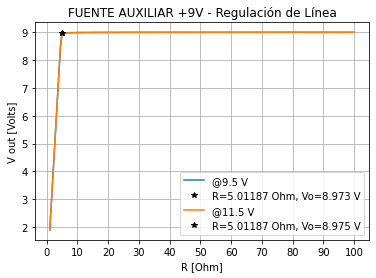

In [ ]:
## FUENTE AUXILIAR +9V
## Regulación de Carga
# Con Vi = 9.5V 
folder = "./RegCarga9V9_5V.csv"
df = pd.read_csv(folder, sep=',')
plt.plot(df["R"],df["Vo mean"])
plt.plot(df["R"][14],df["Vo mean"][14], "*k")
str1="R={0} Ohm, Vo={1} V".format(df["R"][14],np.round(df["Vo mean"][14],3))
## Regulación de Línea
# Con Vi = 11.5V 
folder = "./RegCarga9V11_5V.csv"
df = pd.read_csv(folder, sep=',')
plt.plot(df["R"],df["Vo mean"])
plt.plot(df["R"][14],df["Vo mean"][14], "*k")
str2="R={0} Ohm, Vo={1} V".format(df["R"][14],np.round(df["Vo mean"][14],3))
plt.xticks(np.linspace(0,100,11))
plt.xlabel("R [Ohm]")
plt.ylabel("V out [Volts]")
plt.legend(["@9.5 V ",str1,"@11.5 V",str2])
plt.title("FUENTE AUXILIAR +9V - Regulación de Línea")
plt.grid("minor")
plt.savefig("./RegCarga9V.png")
plt.show()


5.495415e-06
3.528474e-05
7.811934e-05
-5.212569
-8.971089
-9.003013000000001
-9.032753999999999
-9.043298
-9.051592
-9.05813
{'R': [1.0, 5.0, 10.0, 50.0, 75.0, 100.0, 200.0, 300.0, 500.0, 1000.0], 'Vo mean': [5.495415e-06, 3.528474e-05, 7.811934e-05, -5.220933520769567, -8.969980887191157, -9.0007335, -9.032251846715328, -9.04258525940594, -9.051128826595745, -9.057938190155806], 'Vo std': [0.0, 0.0, 0.0, 0.010263410599957296, 0.0031433855698363546, 0.002514399785596798, 0.0012327475139054236, 0.000817480470009609, 0.00048210106875873425, 0.00024043541776442442]}
5.497473e-06
3.529929e-05
7.815684e-05
-5.251030999999999
-8.995481
-9.022765
-9.052433
-9.062503999999999
-9.070799000000001
-9.077219
{'R': [1.0, 5.0, 10.0, 50.0, 75.0, 100.0, 200.0, 300.0, 500.0, 1000.0], 'Vo mean': [5.497473e-06, 3.529929e-05, 7.815684e-05, -5.264230823688969, -9.000732343872327, -9.020792063736264, -9.051291693663165, -9.061719890656736, -9.070305223366477, -9.077111708333334], 'Vo std': [0.0, 0.0, 0.0, 

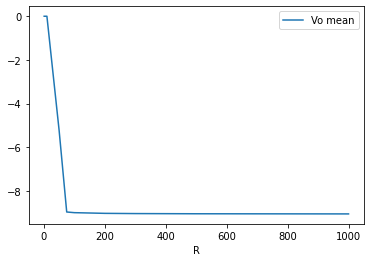

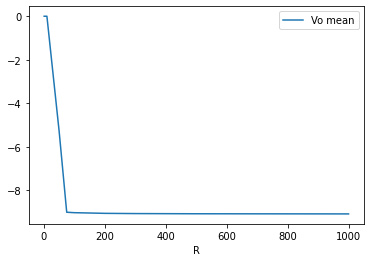

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fuentes 
## Regulación de Carga
folder = "./Fuentes_9VRegCarga12V.txt"
df = pd.read_csv(folder,sep = "\t")
V = {"R": [], "Vo mean":[], "Vo std": []}
aux = {"R": 0, "Vo": []}
for i,v in enumerate(df.values[:]):
  if v[0].startswith("Step"):
    ri = float(v[0].split(" ", 2)[2].split(" ", 1)[0].split("=")[1].replace("K","000"))
    print(df.values[i+1][1])
    if aux["R"]!=0:
      V["Vo mean"].append(np.mean(aux["Vo"]))
      V["Vo std"].append(np.std(aux["Vo"]))
      aux["Vo"] = []
    V["R"].append(ri)
    aux["R"] =ri
  else :
    aux["Vo"].append(df.values[i][1])
V["Vo mean"].append(np.mean(aux["Vo"]))
V["Vo std"].append(np.std(aux["Vo"]))

df = pd.DataFrame(V)
print(V)
df.to_csv("Fuentes_9V_RegCarga12V.csv")
df.plot(x="R", y="Vo mean", yerr = "Vo std")

## Fuentes
## Regulación de Carga
folder = "./Fuentes_9VRegCarga60V.txt"
df = pd.read_csv(folder,sep = "\t")
V = {"R": [], "Vo mean":[], "Vo std": []}
aux = {"R": 0, "Vo": []}
for i,v in enumerate(df.values[:]):
  if v[0].startswith("Step"):
    ri = float(v[0].split(" ", 2)[2].split(" ", 1)[0].split("=")[1].replace("K","000"))
    print(df.values[i+1][1])
    if aux["R"]!=0:
      V["Vo mean"].append(np.mean(aux["Vo"]))
      V["Vo std"].append(np.std(aux["Vo"]))
      aux["Vo"] = []
    V["R"].append(ri)
    aux["R"] =ri
  else :
    aux["Vo"].append(df.values[i][1])
V["Vo mean"].append(np.mean(aux["Vo"]))
V["Vo std"].append(np.std(aux["Vo"]))

df = pd.DataFrame(V)
print(V)
df.to_csv("Fuentes_9V_RegCarga60V.csv")
df.plot(x="R", y="Vo mean", yerr = "Vo std")

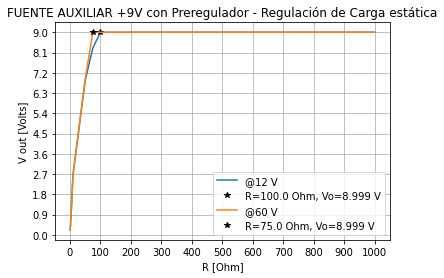

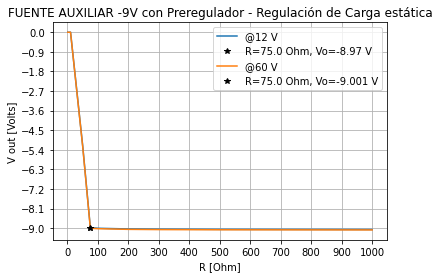

In [ ]:
## FUENTES: AUXILIAR +9V
## Regulación de Carga
# Con Vi = 12V 
folder = "./Fuentes9V_RegCargaE12V.csv"
df = pd.read_csv(folder, sep=',')
plt.plot(df["R"],df["Vo mean"])
i = 5
plt.plot(df["R"][i],df["Vo mean"][i], "*k")
str1="R={0} Ohm, Vo={1} V".format(df["R"][i],np.round(df["Vo mean"][i],3))
## Regulación de Carga
# Con Vi = 60V 
folder = "./Fuentes9V_RegCargaE60V.csv"
df = pd.read_csv(folder, sep=',')
plt.plot(df["R"],df["Vo mean"])
i = 4
plt.plot(df["R"][i],df["Vo mean"][i], "*k")
str2="R={0} Ohm, Vo={1} V".format(df["R"][i],np.round(df["Vo mean"][i],3))
plt.xticks(np.linspace(0,1000,11))
plt.yticks(np.linspace(0,9,11))
plt.xlabel("R [Ohm]")
plt.ylabel("V out [Volts]")
plt.legend(["@12 V ",str1,"@60 V",str2])
plt.title("FUENTE AUXILIAR +9V con Preregulador - Regulación de Carga estática")
plt.grid("minor")
plt.savefig("./Fuentes_RegCargaE9V.png")
plt.show()

## FUENTES: AUXILIAR -9V
## Regulación de Carga
# Con Vi = 12V 
folder = "./Fuentes_9V_RegCargaE12V.csv"
df = pd.read_csv(folder, sep=',')
plt.plot(df["R"],df["Vo mean"])
i = 4
plt.plot(df["R"][i],df["Vo mean"][i], "*k")
str1="R={0} Ohm, Vo={1} V".format(df["R"][i],np.round(df["Vo mean"][i],3))
## Regulación de Carga
# Con Vi = 60V 
folder = "./Fuentes_9V_RegCargaE60V.csv"
df = pd.read_csv(folder, sep=',')
plt.plot(df["R"],df["Vo mean"])
i = 4
plt.plot(df["R"][i],df["Vo mean"][i], "*k")
str2="R={0} Ohm, Vo={1} V".format(df["R"][i],np.round(df["Vo mean"][i],3))
plt.xticks(np.linspace(0,1000,11))
plt.yticks(np.linspace(-9,0,11))
plt.xlabel("R [Ohm]")
plt.ylabel("V out [Volts]")
plt.legend(["@12 V ",str1,"@60 V",str2])
plt.title("FUENTE AUXILIAR -9V con Preregulador - Regulación de Carga estática")
plt.grid("minor")
plt.savefig("./Fuentes_RegCargaE_9V.png")
plt.show()

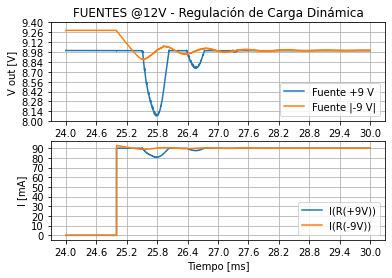

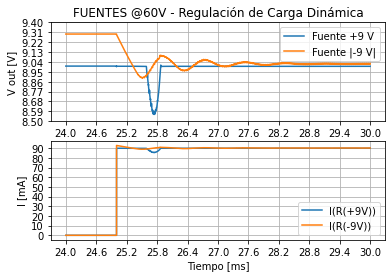

In [ ]:
## FUENTES:
## Regulación de Carga Dinámica
# Con Vi = 12V R = 100 Ohm
folder = "./Fuentes_RegCargaD_12VR100.txt"
df = pd.read_csv(folder, sep='\t')
# Normalizo a ms y mA
df[["-I(R16)","I(R15)","time"]] = df[["-I(R16)","I(R15)","time"]]*1000
df = df[df["time"]>24] # Tomo ventana alrededor de los 25ms 
df = df[df["time"]<30] # donde se activa la carga
plt.subplot(2,1,1)
plt.plot(df["time"], df["V(v+)"])
plt.plot(df["time"], df["-V(v-)"])
plt.yticks(np.linspace(8,9.4,11))
plt.ylabel("V out [V]")
plt.xticks(np.linspace(24,30,11))
plt.grid("minor")
plt.legend(["Fuente +9 V","Fuente |-9 V|"])
plt.title("FUENTES @12V - Regulación de Carga Dinámica")

plt.subplot(2,1,2)
plt.plot(df["time"], df["-I(R16)"])
plt.plot(df["time"], df["I(R15)"])
plt.yticks(np.linspace(0,90,10))
plt.xticks(np.linspace(24,30,11))
plt.ylabel("I [mA]")
plt.xlabel("Tiempo [ms]")
plt.legend(["I(R(+9V))","I(R(-9V))"])
plt.grid("minor")
plt.savefig("./Fuentes_RegCargaD_12V10Ohm.png")
plt.show()

## FUENTES:
## Regulación de Carga Dinámica
# Con Vi = 60V R = 100 Ohm
folder = "./Fuentes_RegCargaD_60VR100.txt"
df = pd.read_csv(folder, sep='\t')
# Normalizo a ms y mA
df[["-I(R16)","I(R15)","time"]] = df[["-I(R16)","I(R15)","time"]]*1000
df = df[df["time"]>24] # Tomo ventana alrededor de los 25ms 
df = df[df["time"]<30] # donde se activa la carga
plt.subplot(2,1,1)
plt.plot(df["time"], df["V(v+)"])
plt.plot(df["time"], df["-V(v-)"])
plt.yticks(np.linspace(8.5,9.4,11))
plt.ylabel("V out [V]")
plt.xticks(np.linspace(24,30,11))
plt.grid("minor")
plt.legend(["Fuente +9 V","Fuente |-9 V|"])
plt.title("FUENTES @60V - Regulación de Carga Dinámica")

plt.subplot(2,1,2)
plt.plot(df["time"], df["-I(R16)"])
plt.plot(df["time"], df["I(R15)"])
plt.yticks(np.linspace(0,90,10))
plt.xticks(np.linspace(24,30,11))
plt.ylabel("I [mA]")
plt.xlabel("Tiempo [ms]")
plt.legend(["I(R(+9V))","I(R(-9V))"])
plt.grid("minor")
plt.savefig("./Fuentes_RegCargaD_60V10Ohm.png")
plt.show()
